In [4]:
library("AzureML")

ws <- workspace(
  id = "",
  auth = "",
  api_endpoint = "https://studioapi.azureml.net"
)
df <- download.datasets(
  dataset = ws,
  name = "CreditCardDefault.txt"
)


In [5]:
head(df)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [8]:
#install.packages("caret")
library(caret)

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)
also installing the dependencies 'minqa', 'RcppEigen', 'profileModel', 'lme4', 'brglm', 'nlme', 'BradleyTerry2'




The downloaded source packages are in
	'/tmp/Rtmp5YLeiU/downloaded_packages'


Loading required package: lattice
Loading required package: ggplot2


In [9]:
names(df)[25] <- "DEFAULT"
split <- createDataPartition(df$DEFAULT, times = 2, p = 0.8, list=FALSE)
train <- na.omit(df[split,])
test <- na.omit(df[-split,])

In [10]:
head(train)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [11]:
head(test)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
23,23,70000,2,2,2,26,2,0,0,2,...,44006,46905,46012,2007,3582,0,3601,0,1820,1
28,28,50000,2,3,2,30,0,0,0,0,...,17878,18931,19617,1300,1300,1000,1500,1000,1012,0
35,35,500000,1,1,1,58,-2,-2,-2,-2,...,3180,0,5293,5006,31178,3180,0,5293,768,0
36,36,160000,1,1,2,30,-1,-1,-2,-2,...,-923,-1488,-1884,131,396,396,565,792,0,0
41,41,360000,1,1,2,33,0,0,0,0,...,628699,195969,179224,10000,7000,6000,188840,28000,4000,0


In [12]:
library(ggplot2)

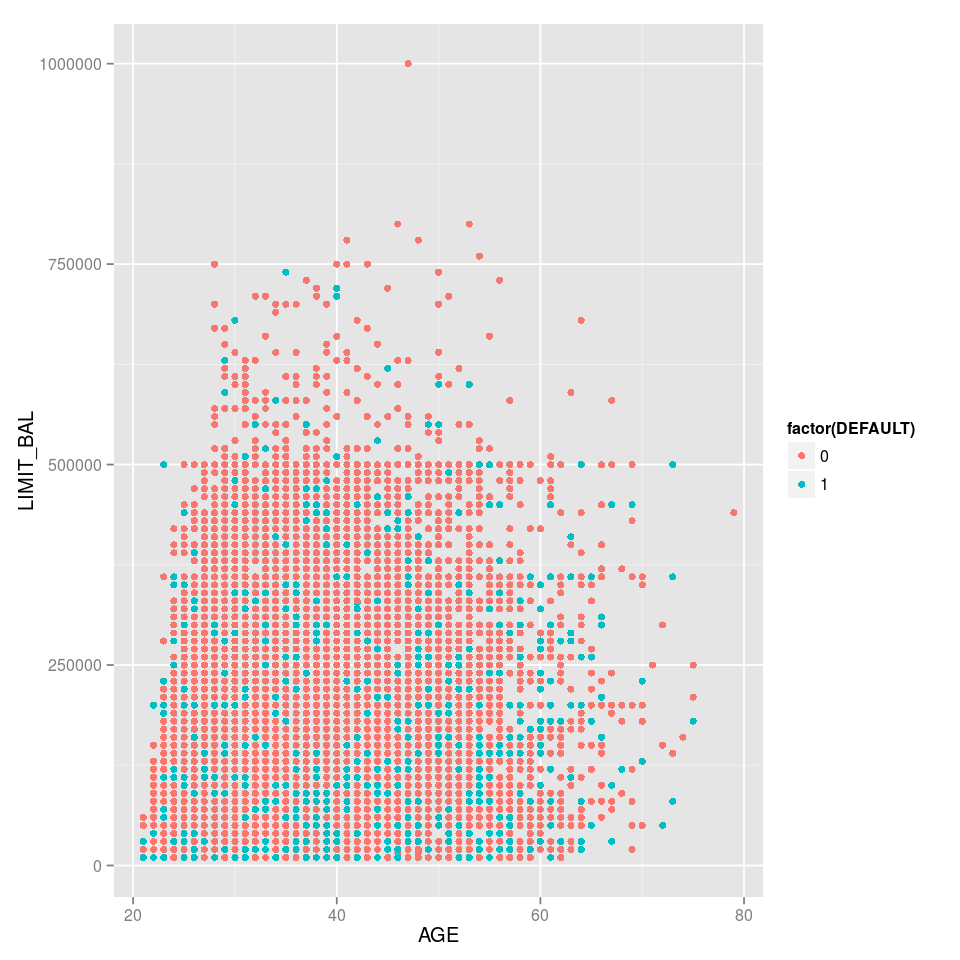

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train, aes(x = AGE, y = LIMIT_BAL, color = factor(DEFAULT))) + geom_point()

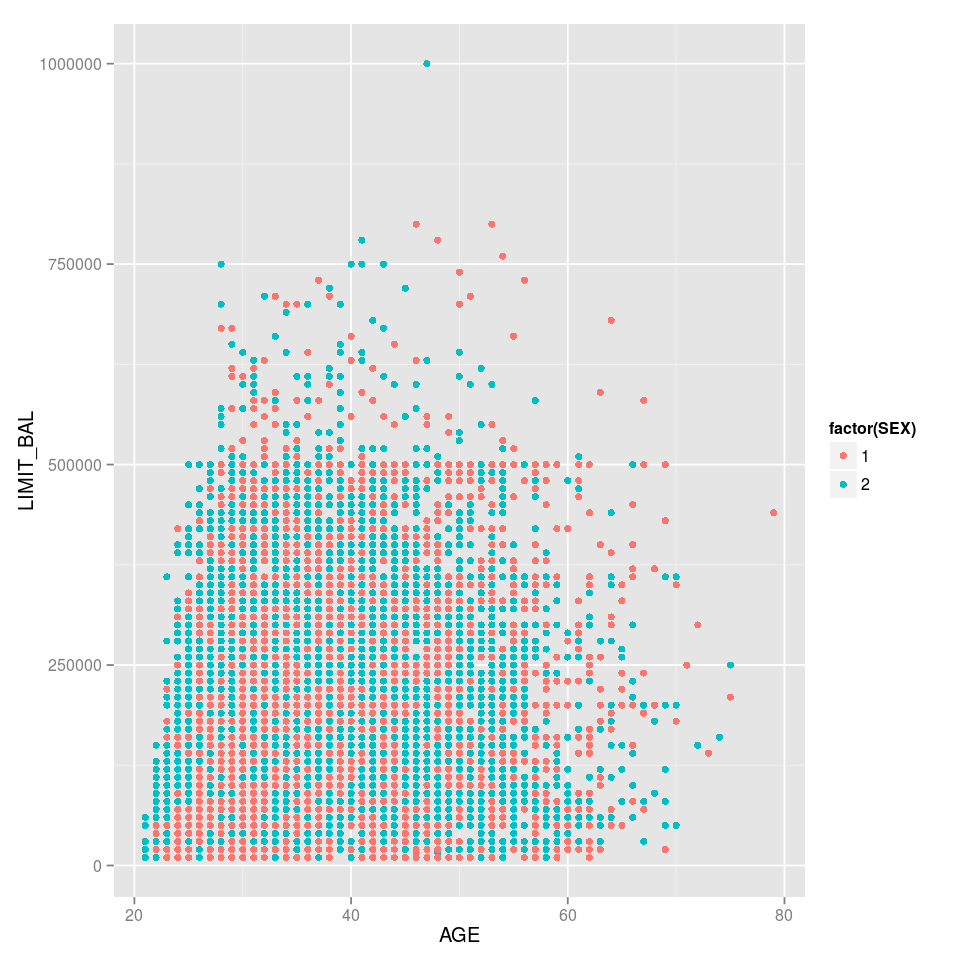

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train[train$DEFAULT == 0, ], aes(x = AGE, y = LIMIT_BAL, color = factor(SEX))) + geom_point()

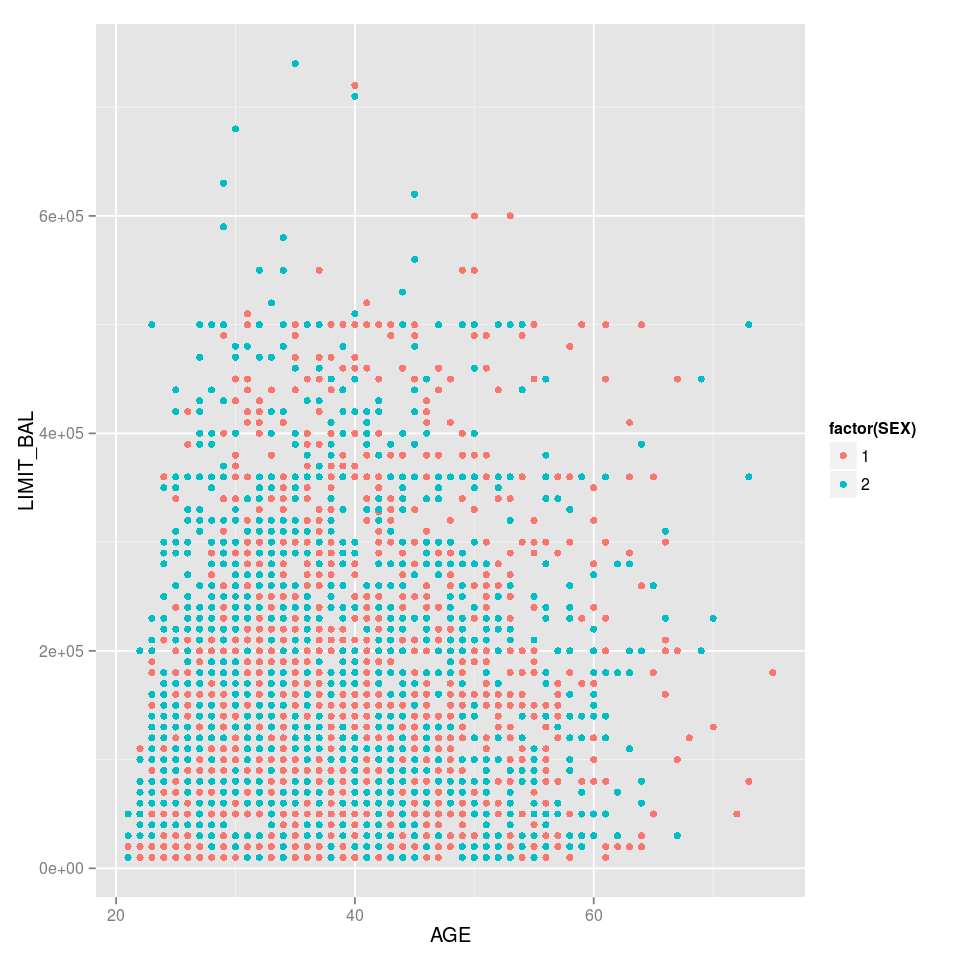

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train[train$DEFAULT == 1, ], aes(x = AGE, y = LIMIT_BAL, color = factor(SEX))) + geom_point()

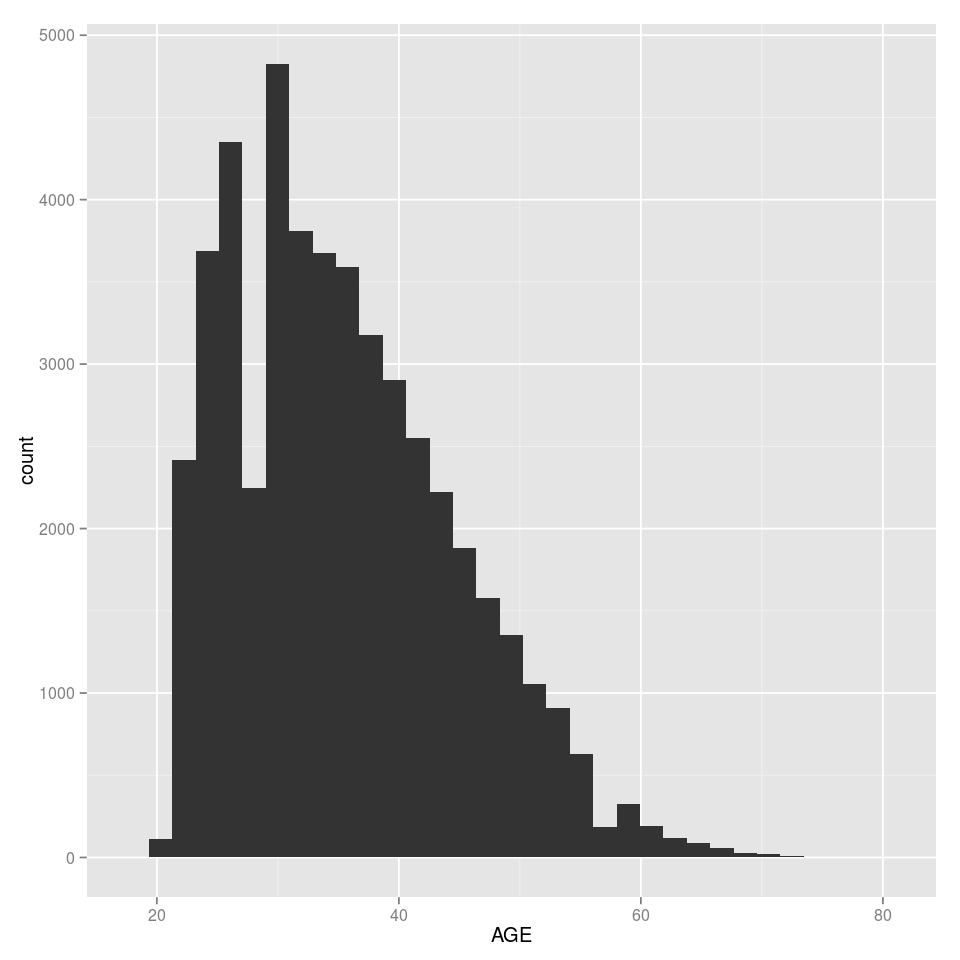

In [16]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train, aes(x = AGE)) + geom_histogram()

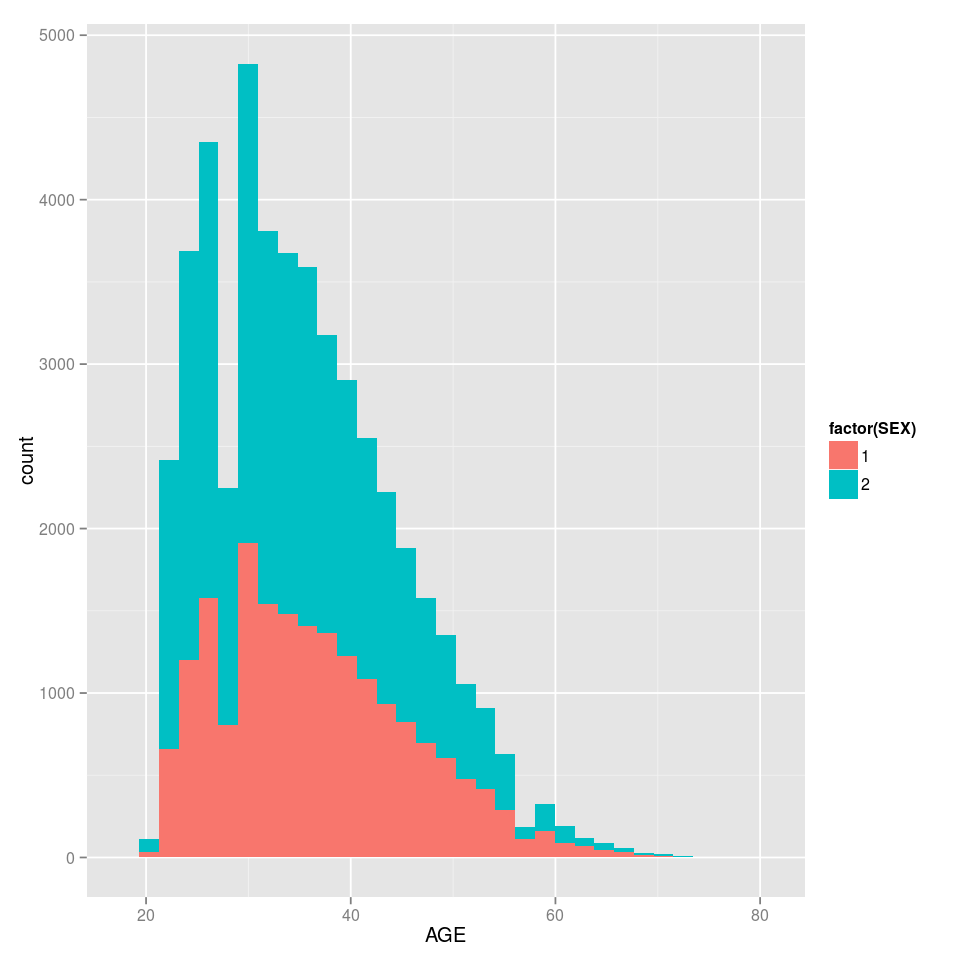

In [17]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train, aes(x = AGE, fill = factor(SEX))) + geom_histogram()

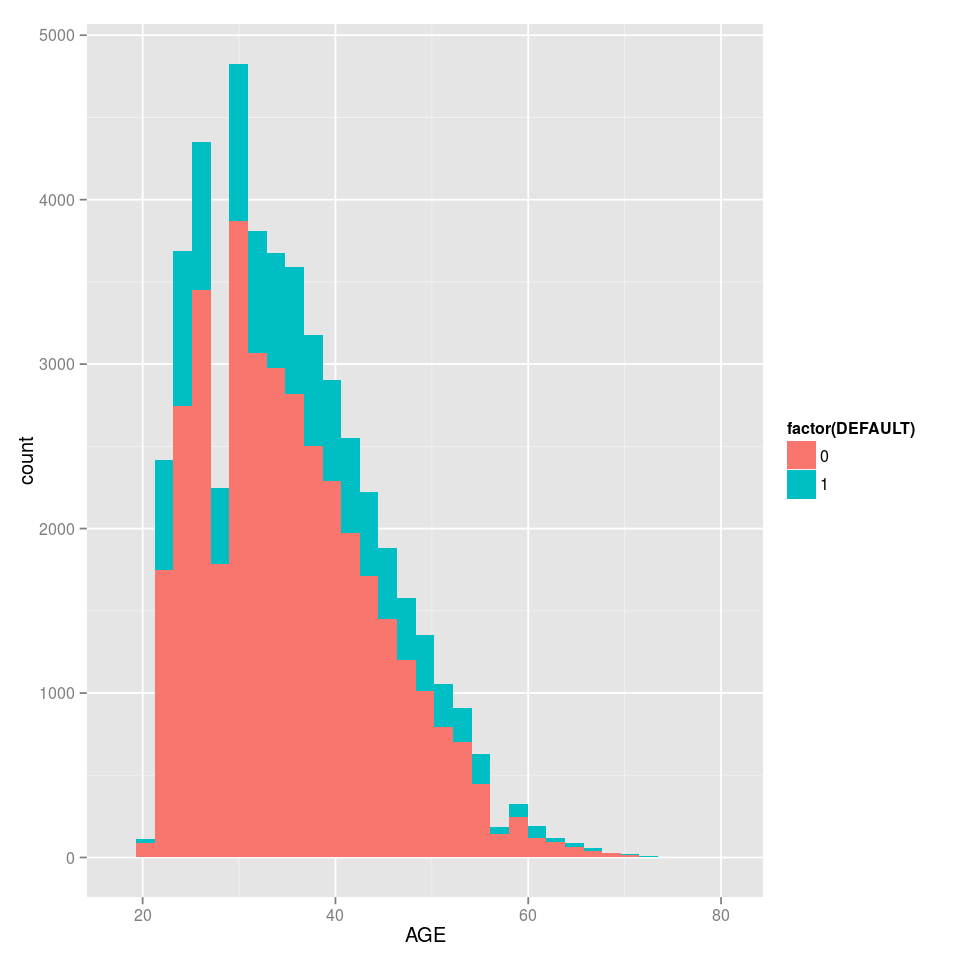

In [18]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train, aes(x = AGE, fill = factor(DEFAULT))) + geom_histogram()

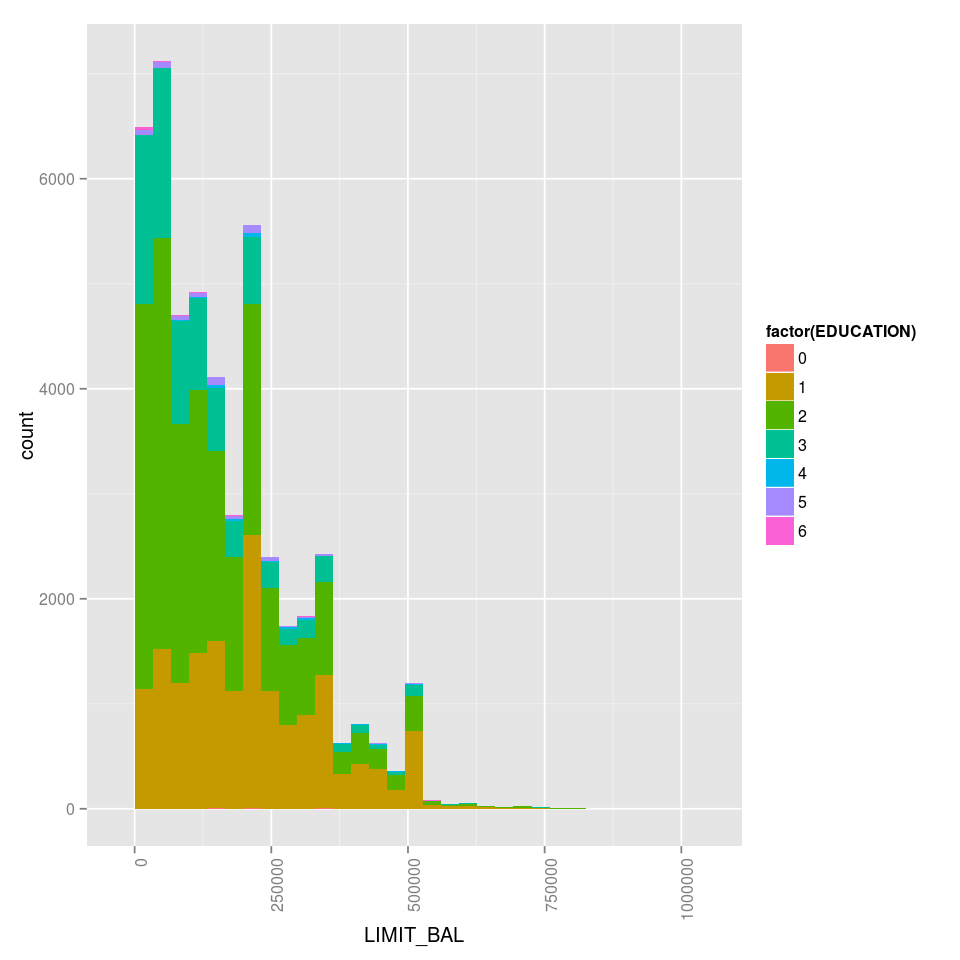

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train, aes(x = LIMIT_BAL, fill = factor(EDUCATION))) + geom_histogram() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

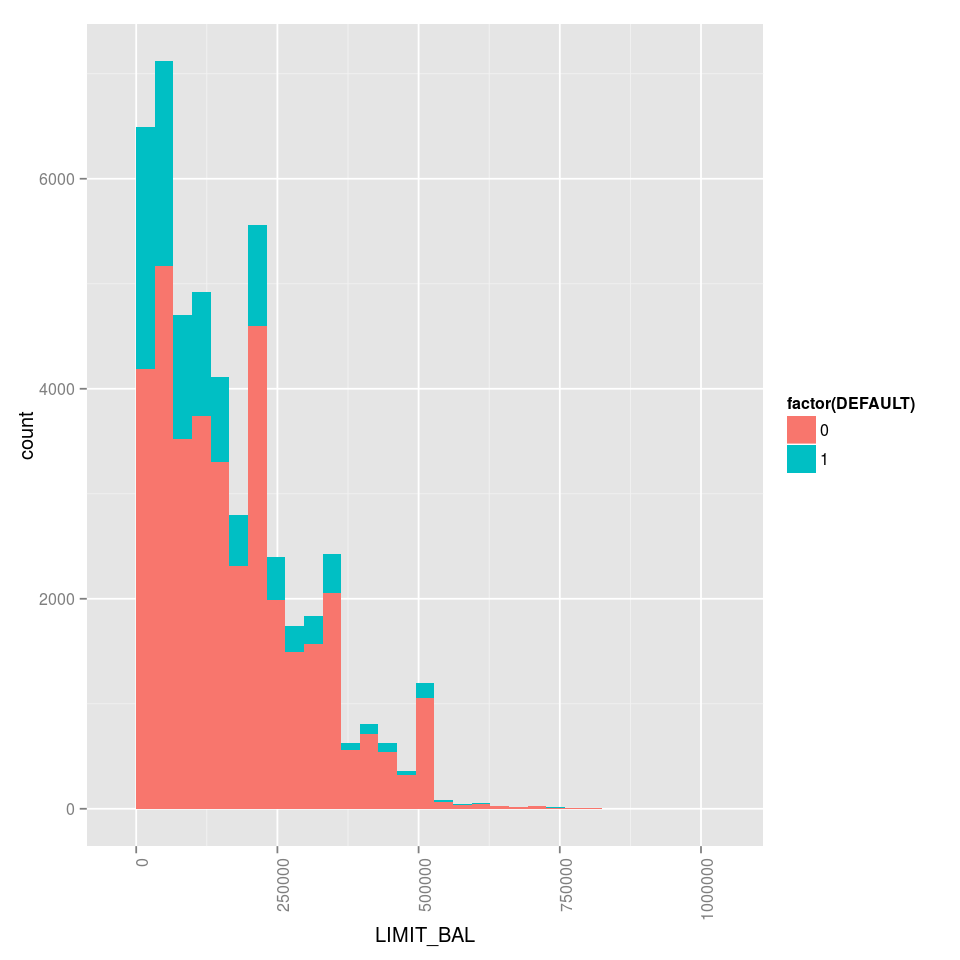

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train, aes(x = LIMIT_BAL, fill = factor(DEFAULT))) + geom_histogram() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

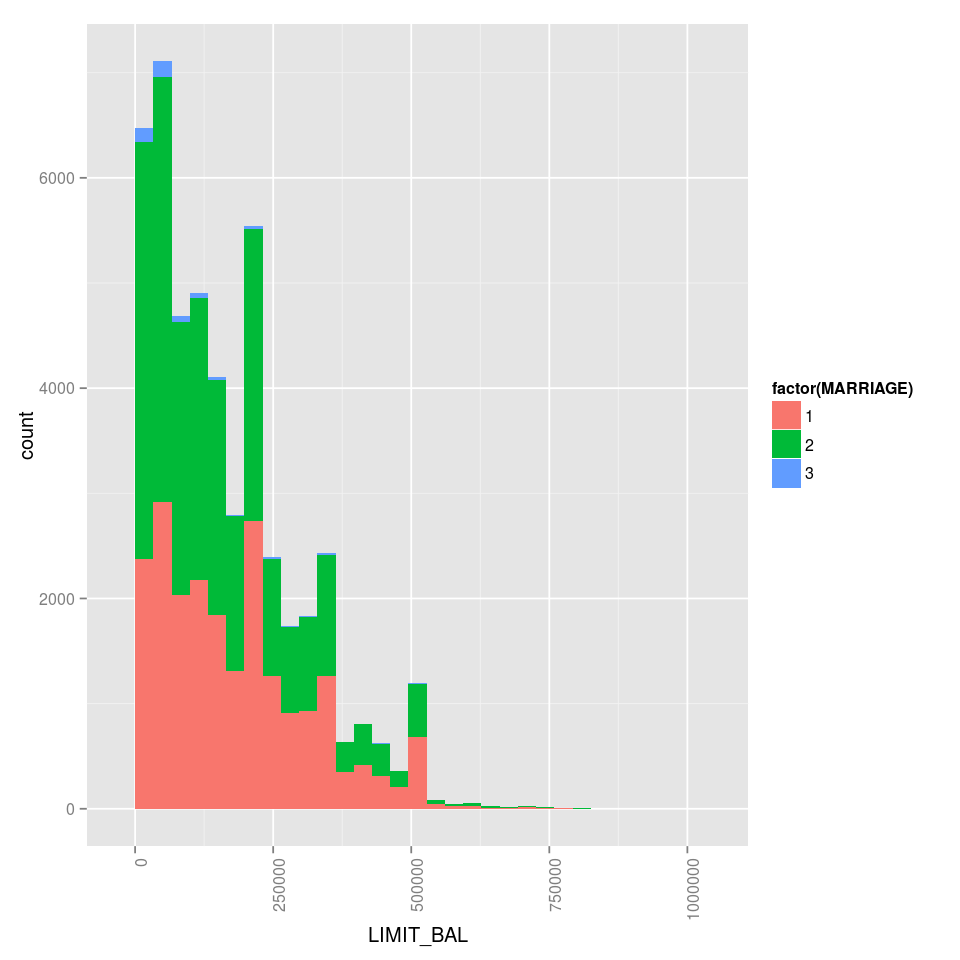

In [21]:
#Marital status (1 = married; 2 = single; 3 = others)
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train[train$MARRIAGE!=0,], aes(x = LIMIT_BAL, fill = factor(MARRIAGE))) + geom_histogram() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [22]:
#Time period: September 2005 to April 2005
#Past monthly payments PAY_0 to PAY_6 (PAY_1 not present)
#Amount of bill statement BILL_AMT1 to BILL_AMT6
#Amount of previous payment PAY_AMT1 to PAY_AMT6
#The measurement scale for the repayment status is:
#-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ... ; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
#There are a lot of -2s and 0s but no 9s. Why?

In [23]:
train1 <- cbind(train)
train1$DIFF1 <- (train1$BILL_AMT2 - train1$PAY_AMT1)
train1$DIFF2 <- (train1$BILL_AMT3 - train1$PAY_AMT2)
train1$DIFF3 <- (train1$BILL_AMT4 - train1$PAY_AMT3)
train1$DIFF4 <- (train1$BILL_AMT5 - train1$PAY_AMT4)
train1$DIFF5 <- (train1$BILL_AMT6 - train1$PAY_AMT5)

In [24]:
head(train1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,DIFF1,DIFF2,DIFF3,DIFF4,DIFF5
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,3102,0,0,0,0
2,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,1725,1682,2272,2455,3261
3,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,12509,12059,13331,13948,14549
4,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,46233,47272,27114,27859,28478
6,6,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,54569,55793,18737,18619,19024
7,7,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,357023,405007,504653,462764,460194


In [26]:
#install.packages("grid")
#install.packages("gridExtra")

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)
Warning message:
: package 'grid' is not available (for R version 3.1.1)Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/Rtmp5YLeiU/downloaded_packages'


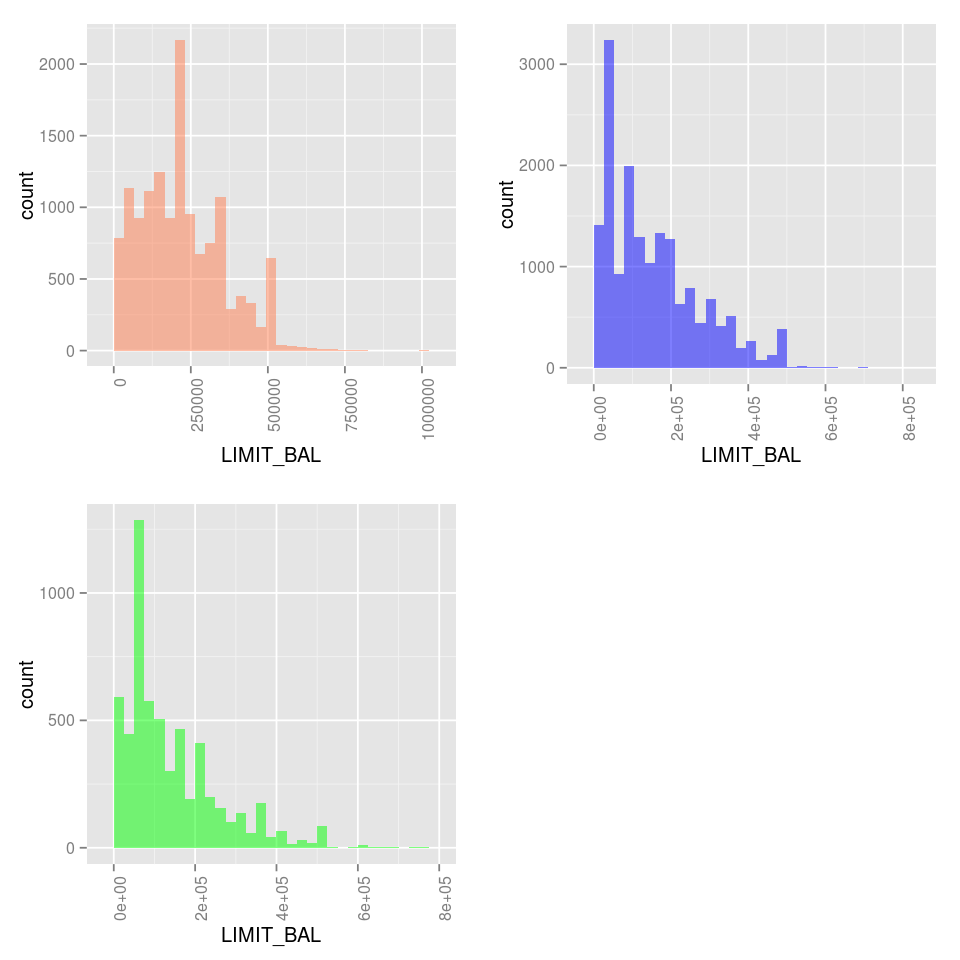

In [27]:
options(repr.plot.width=8, repr.plot.height=8)
library(grid)
library(gridExtra)
options(repr.plot.width=8, repr.plot.height=8)
p1 <- ggplot(data = train[(train$EDUCATION == 1 & train$DEFAULT == 0),], aes(x = LIMIT_BAL)) + geom_histogram(fill = "coral", alpha = 0.5) + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p2 <- ggplot(data = train[(train$EDUCATION == 2 & train$DEFAULT == 0),], aes(x = LIMIT_BAL)) + geom_histogram(fill = "blue", alpha = 0.5) + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p3 <- ggplot(data = train[(train$EDUCATION == 3 & train$DEFAULT == 0),], aes(x = LIMIT_BAL)) + geom_histogram(fill = "green", alpha = 0.5) + theme(axis.text.x = element_text(angle = 90, hjust = 1))
grid.arrange(p1, p2, p3, nrow = 2, ncol = 2)

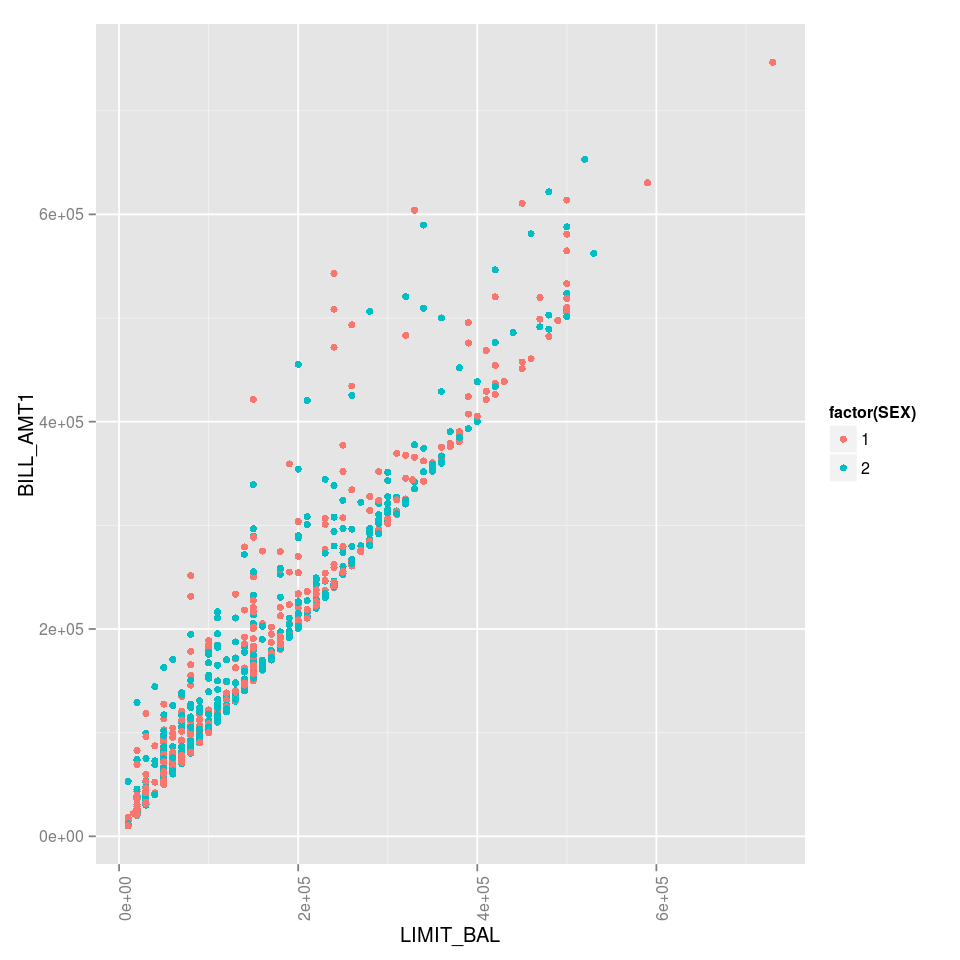

In [28]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = train[train$BILL_AMT1 >= train$LIMIT_BAL,], aes(x = LIMIT_BAL, y = BILL_AMT1, color = factor(SEX))) + geom_point() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

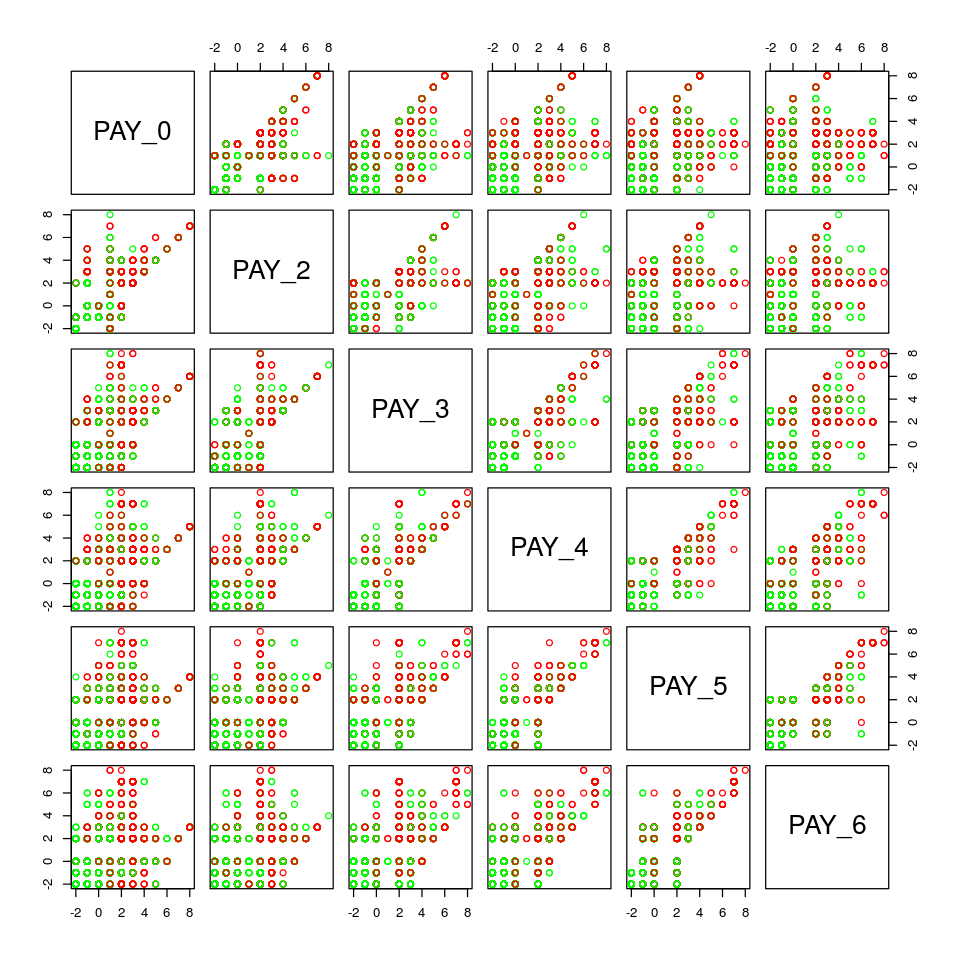

In [30]:
#pairplots to view relationships for PAY columns
options(repr.plot.width=8, repr.plot.height=8)
cols <- character(nrow(train1))
cols[] <- "black"
cols[train1$DEFAULT %in% c(0)] <- "green"
cols[train1$DEFAULT %in% c(1)] <- "red"
pairs(~ PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6, data = train1, col = cols)

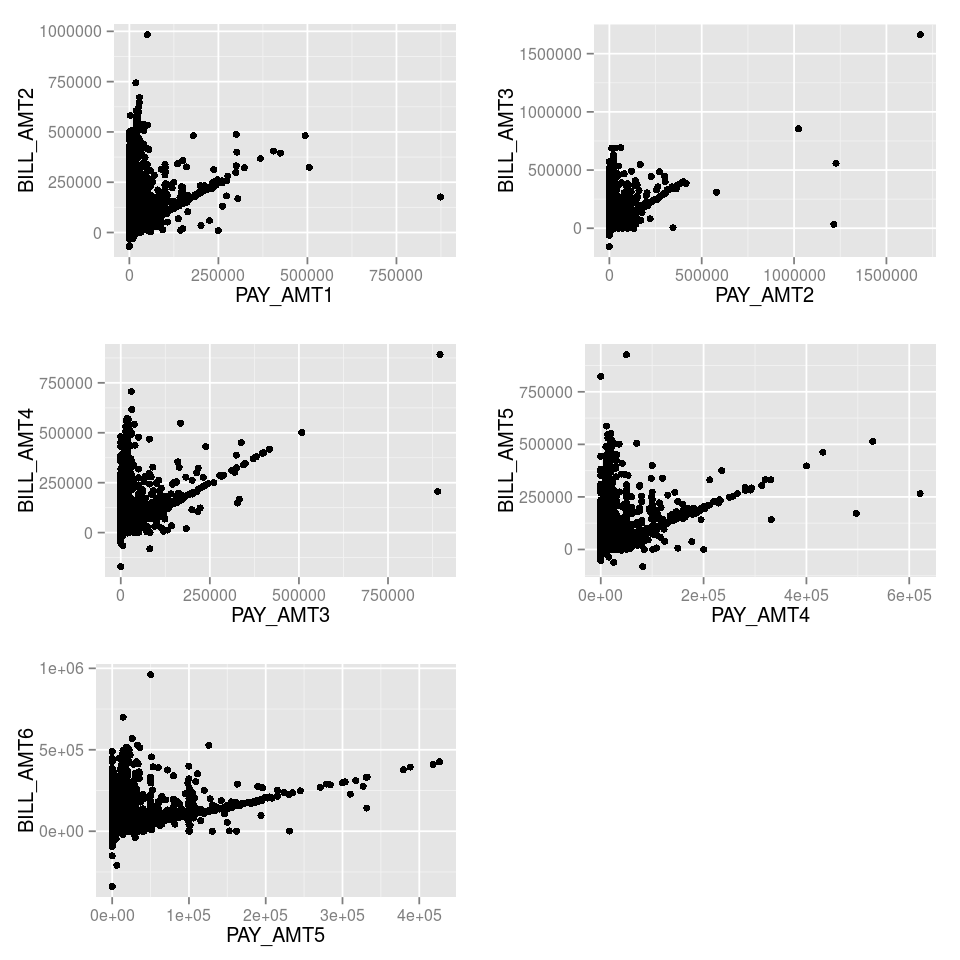

In [32]:
#more relationships
p1 <- ggplot(train1, aes(PAY_AMT1, BILL_AMT2)) + geom_point()
p2 <- ggplot(train1, aes(PAY_AMT2, BILL_AMT3)) + geom_point()
p3 <- ggplot(train1, aes(PAY_AMT3, BILL_AMT4)) + geom_point()
p4 <- ggplot(train1, aes(PAY_AMT4, BILL_AMT5)) + geom_point()
p5 <- ggplot(train1, aes(PAY_AMT5, BILL_AMT6)) + geom_point()
grid.arrange(p1, p2, p3, p4, p5, nrow = 3, ncol = 2)